In [1]:
#Notebook to make supplemental figures for the GRL paper. 

#Which ones are they? 
#S1: CMIP5 polar amplificiation  vs. TRACMIP
#S2: Dot plots showing polar amplification as a ratio
#S3: Fig. 3a,b with no relative humidity
#S4: Fig. 4a with no relative humidity

#S3 and S4 done in separate notebooks

#Order of S1 and S2 may change depending on which is mentioned first in the text

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from voigtColors import voigtColors

In [3]:
#Lists of models 

models_12 = ['AM2', 'CAM3', 'CAM4', 'CNRM-AM6-DIA-v2', 'ECHAM-6.1', 'ECHAM-6.3',
       'IPSL-CM5A', 'MIROC5', 'MPAS', 'MetUM-GA6-CTL', 'MetUM-GA6-ENT',
       'NorESM2']

In [4]:

#####   FIGURE S1   #####


In [5]:
#Load GCM results and calculate anomalies (TRACMIP)
ds_GCM = xr.open_dataset('../nc_revised_20181130/master.nc')
ds_GCM_anom = (ds_GCM.sel(exp='Aqua4xCO2')-ds_GCM.sel(exp='AquaControl')).mean(dim='time').mean(dim='lon')

/usr/local/python/anaconda3/envs/pangeo-latest/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [33]:
#List of CMIP5 models
models_CMIP5 = ['ACCESS1-0', 
                'ACCESS1-3', 
                'bcc-csm1-1', 
                'bcc-csm1-1-m', 
                'BNU-ESM', 
                'CanESM2', 
                'CCSM4', 
                #'CESM1-CAM5-1-FV2', #Tried to make it work but has a linear ramp
                'CNRM-CM5', 
                'CNRM-CM5-2', 
                'CSIRO-Mk3-6-0', 
                #'EC-EARTH',  #Don't have ts for piControl for this model (only tas, not same thing)
                'FGOALS-g2', 
                'FGOALS-s2', 
                'GFDL-CM3', 
                'GFDL-ESM2G', 
                'GFDL-ESM2M', 
                'GISS-E2-H', 
                'GISS-E2-R', 
                'HadGEM2-ES', 
                'inmcm4', 
                'IPSL-CM5A-LR', 
                'IPSL-CM5A-MR', 
                'IPSL-CM5B-LR', 
                'MIROC-ESM', 
                'MIROC5', 
                'MPI-ESM-LR', 
                'MPI-ESM-MR', 
                'MPI-ESM-P', 
                'MRI-CGCM3', 
                'NorESM1-M'
                ]


In [34]:
#Loop through the models and load the temperature anomalies for each month from LDEO data library
d_ts_CMIP5 = dict()
for model in models_CMIP5:
    print('Loading CMIP5 ts differences for model: '+ model)
#     if model in ['CESM1-CAM5-1-FV2']:
#         d_ts_CMIP5[model] = xr.open_dataarray('http://strega.ldeo.columbia.edu:81/expert/CMIP5/.monthly/.byScenario/.abrupt4xCO2/.atmos/.mon/.ts/.' + 
#                                             model + 
#                                             '/.r3i1p1/.ts/T/961/1200/RANGEEDGES%5BT%5Daverage/CMIP5/.monthly/.byScenario/.piControl/.atmos/.mon/.ts/.' + 
#                                             'CESM1-CAM5' + #different name for piControl for some reason
#                                             '/.r1i1p1/.ts/T/961/1200/RANGEEDGES%5BT%5Daverage/sub/dods', 
#                                             decode_times=False)
#     else:
    d_ts_CMIP5[model] = xr.open_dataarray('http://strega.ldeo.columbia.edu:81/expert/CMIP5/.monthly/.byScenario/.abrupt4xCO2/.atmos/.mon/.ts/.' + 
                                          model + 
                                          '/.r1i1p1/.ts/T/961/1200/RANGEEDGES%5BT%5Daverage/CMIP5/.monthly/.byScenario/.piControl/.atmos/.mon/.ts/.' + 
                                          model +
                                          '/.r1i1p1/.ts/T/961/1200/RANGEEDGES%5BT%5Daverage/sub/dods', 
                                          decode_times=False)

Loading CMIP5 ts differences for model: ACCESS1-0
Loading CMIP5 ts differences for model: ACCESS1-3
Loading CMIP5 ts differences for model: bcc-csm1-1
Loading CMIP5 ts differences for model: bcc-csm1-1-m
Loading CMIP5 ts differences for model: BNU-ESM
Loading CMIP5 ts differences for model: CanESM2
Loading CMIP5 ts differences for model: CCSM4
Loading CMIP5 ts differences for model: CNRM-CM5
Loading CMIP5 ts differences for model: CNRM-CM5-2
Loading CMIP5 ts differences for model: CSIRO-Mk3-6-0
Loading CMIP5 ts differences for model: FGOALS-g2
Loading CMIP5 ts differences for model: FGOALS-s2
Loading CMIP5 ts differences for model: GFDL-CM3
Loading CMIP5 ts differences for model: GFDL-ESM2G
Loading CMIP5 ts differences for model: GFDL-ESM2M
Loading CMIP5 ts differences for model: GISS-E2-H
Loading CMIP5 ts differences for model: GISS-E2-R
Loading CMIP5 ts differences for model: HadGEM2-ES
Loading CMIP5 ts differences for model: inmcm4
Loading CMIP5 ts differences for model: IPSL-CM5A-L

In [35]:
#print(d_ts_CMIP5)

In [37]:
def setuppanel_zonalmean(ax, title, ylabel = 'Temperature anomaly (K)', ylims='default', equator=False, fontsize=12):
    plt.hlines(0, -1, 1, linestyles='dashed') #zero line
    ax.set_xticks([-.866, -.5, 0, .5, .866])
    ax.xaxis.set_ticklabels(['-60$\degree$', '-30$\degree$', '0$\degree$', '30$\degree$', '60$\degree$'])
    ax.tick_params(labelsize=12)
    plt.xlabel('Latitude', fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.title(title, fontsize=fontsize)
    ax.set_xlim([-1,1])
    if not ylims=='default':
        ax.set_ylim(ylims)
    if equator:
        plt.vlines(0, ax.get_ylim()[0], ax.get_ylim()[1], linestyles='dashed', linewidth=0.5) 

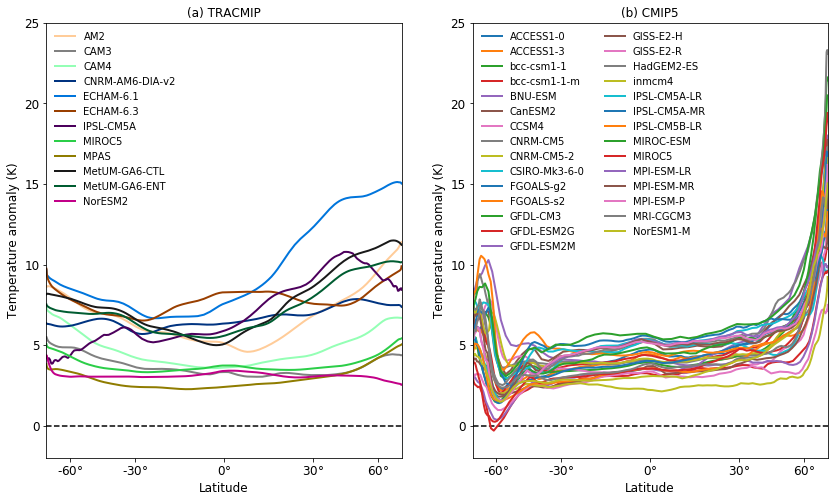

In [54]:
#Plot side by side comparison with TRACMIP
plt.figure(figsize=(14,8))

ax = plt.subplot(1,2,1)
setuppanel_zonalmean(ax, '(a) TRACMIP', ylims=[-2, 25])
for model in models_12: 
    plt.plot(np.sin(ds_GCM_anom.lat*np.pi/180.), ds_GCM_anom['ts'].sel(model=model), color=voigtColors[model], linewidth=2)
    #plt.plot(ds_GCM_anom.lat, ds_GCM_anom['ts'].sel(model=model), color=voigtColors[model], linewidth=2)
    #ax.set_xlim(-90, 90)
    ax.legend(models_12, loc='upper left', frameon=False)
             
ax = plt.subplot(1,2,2)
setuppanel_zonalmean(ax, '(b) CMIP5', ylims=[-2, 25])
for model in models_CMIP5:
    plt.plot(np.sin(d_ts_CMIP5[model].lat*np.pi/180.), d_ts_CMIP5[model].mean(dim='lon'), linewidth=2)
    #plt.plot(d_ts_CMIP5[model].lat, d_ts_CMIP5[model].mean(dim='lon'), linewidth=2)
    #ax.set_xlim(-90, 90)
    ax.legend(models_CMIP5, loc='upper left', ncol=2, frameon=False)
    
plt.savefig('plots/zonal_mean_warming_TRACMIP_vs_CMIP5.png')
plt.savefig('plots/zonal_mean_warming_TRACMIP_vs_CMIP5.pdf')

In [56]:

#####   FIGURE S2   #####


In [57]:
#Load the EBM experiment results ("noG" versions)
EBM_control = xr.open_dataset('nc_from_xarray/EBM_perturb_results_noG_096e4.nc')
EBM_f_inst = xr.open_dataset('nc_from_xarray/EBM_results_noG_f_inst.nc')
EBM_adj_sw_cloud = xr.open_dataset('nc_from_xarray/EBM_results_noG_adj_sw_cloud.nc')
EBM_adj_sw_noncloud = xr.open_dataset('nc_from_xarray/EBM_results_noG_adj_sw_noncloud.nc')
EBM_adj_lw_ta = xr.open_dataset('nc_from_xarray/EBM_results_noG_adj_lw_ta.nc')
EBM_adj_lw_wv = xr.open_dataset('nc_from_xarray/EBM_results_noG_adj_lw_wv.nc')
EBM_adj_lw_cloud = xr.open_dataset('nc_from_xarray/EBM_results_noG_adj_lw_cloud.nc')
EBM_fb_sw_cloud = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_sw_cloud.nc')
EBM_fb_sw_noncloud = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_sw_noncloud.nc')
EBM_fb_lw_wv = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_lw_wv.nc')
EBM_fb_lw_ts = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_lw_ts.nc')
EBM_fb_lw_cloud = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_lw_cloud.nc')
EBM_fb_lw_ta_10p = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_lw_ta_10p.nc')

In [58]:
def areaWeightedMean(data):
    weights=np.cos(data.lat*np.pi/180.).values
    weighted = data*weights
    sumWeighted = weighted.sum(dim='lat')
    sumWeights = np.sum(weights)
    return sumWeighted/sumWeights

In [59]:
gm_all = areaWeightedMean(EBM_control)

In [61]:
exp_list=['all', 'no_f_inst', 
          'no_adj_sw_cloud', 'no_adj_sw_noncloud', 'no_adj_lw_cloud', 'no_adj_lw_wv', 'no_adj_lw_ta', 
     'no_fb_sw_cloud', 'no_fb_sw_noncloud', 'no_fb_lw_cloud', 'no_fb_lw_wv', 'no_fb_lw_ts', 
     'no_fb_lw_ta_10p']
exp=pd.Index(exp_list)
print(exp)

Index(['all', 'no_f_inst', 'no_adj_sw_cloud', 'no_adj_sw_noncloud',
       'no_adj_lw_cloud', 'no_adj_lw_wv', 'no_adj_lw_ta', 'no_fb_sw_cloud',
       'no_fb_sw_noncloud', 'no_fb_lw_cloud', 'no_fb_lw_wv', 'no_fb_lw_ts',
       'no_fb_lw_ta_10p'],
      dtype='object')


In [62]:
#Concatenate EBM results along the experiment dimension (note some of them will be missing a model or two...)
EBM_results = xr.concat([EBM_control, EBM_f_inst, EBM_adj_sw_cloud, EBM_adj_sw_noncloud, 
                         EBM_adj_lw_cloud, EBM_adj_lw_wv, EBM_adj_lw_ta, 
                         EBM_fb_sw_cloud, EBM_fb_sw_noncloud, 
                         EBM_fb_lw_cloud, EBM_fb_lw_wv, EBM_fb_lw_ts, 
                         EBM_fb_lw_ta_10p], dim=exp)
EBM_results = EBM_results.rename({'concat_dim': 'exp'})
print(EBM_results)

<xarray.Dataset>
Dimensions:             (exp: 13, lat: 180, model: 12)
Coordinates:
  * model               (model) object 'AM2' 'CAM3' ... 'NorESM2'
  * lat                 (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * exp                 (exp) object 'all' 'no_f_inst' ... 'no_fb_lw_ta_10p'
Data variables:
    CorrectedTransport  (exp, model, lat) float64 -3.224e+11 ... -3.081e+07
    Diffusion           (exp, model, lat) float64 8.303 9.573 ... 5.872 6.48
    MSE                 (exp, model, lat) float64 3.209e+05 ... 2.837e+05
    MSE_anom            (exp, model, lat) float64 2.618e+04 ... 2.426e+03
    NorthTransport      (exp, model, lat) float64 -3.224e+11 ... -1.618e+12
    q                   (exp, model, lat) float64 0.01113 0.01121 ... 0.003355
    TS_perturb          (exp, model, lat) float64 11.39 11.32 ... 1.527 1.536
    TS                  (exp, model, lat) float64 291.9 292.0 ... 274.2 274.2


In [66]:
# print(EBM_results['TS_perturb'].sel(exp='no_fb_lw_wv', lat=-87.5))
# print(EBM_results['TS_perturb'].sel(exp='no_fb_lw_cloud', lat=-87.5))
# print(EBM_results['TS_perturb'].sel(exp='no_f_inst', lat=-87.5))

In [70]:
#Calculate global mean temperature
gm = areaWeightedMean(EBM_results)

#Manually put nans back in for things that are missing so we don't get spurious 0 values in the plots
for var in list(dict(gm.data_vars).keys()):
    gm[var].loc[dict(model='NorESM2', exp=['no_f_inst', 'no_adj_lw_cloud', 'no_fb_lw_cloud'])] = np.nan
    gm[var].loc[dict(model='CNRM-AM6-DIA-v2', exp=['no_f_inst', 'no_adj_lw_wv', 'no_fb_lw_wv', 'no_adj_lw_cloud', 'no_fb_lw_cloud'])] = np.nan

In [86]:
#Calculate polar amplification ratio and difference
EBM_results_poleward_70 = EBM_results.sel(lat=EBM_results.lat[np.abs(EBM_results.lat)>70])
mean_poleward_70 = areaWeightedMean(EBM_results_poleward_70)
polar_amp = mean_poleward_70['TS_perturb']/gm['TS_perturb']
polar_amp_diff = polar_amp-polar_amp.sel(exp='all')

In [ ]:
#print values for debugging

In [119]:
print(mean_poleward_70['TS_perturb'])

<xarray.DataArray 'TS_perturb' (exp: 13, model: 12)>
array([[10.31481582,  6.30081038,  6.67787232, 10.00804582, 10.75092747,
         9.72383568,  7.45676973,  4.92738462,  3.64918904, 11.76330321,
        10.1846675 ,  1.40765732],
       [ 0.13513488, -0.171267  ,  0.60760494,  0.        ,  0.8052745 ,
         0.37537535,  2.22877375,  1.2010198 , -1.88165979,  1.84186396,
         1.9158444 ,  0.        ],
       [12.81528407,  7.37708956,  7.12605561, 10.93488089, 14.86072194,
        11.09753676,  7.62857574,  4.97989905,  8.69829572, 14.81318454,
        12.0740203 ,  1.78915925],
       [ 9.52628402,  6.16667537,  6.55897455,  8.5182566 , 10.22498996,
         9.45928719,  5.58959879,  4.76774244,  3.2524026 , 10.96874042,
         9.48923573,  1.29128139],
       [ 9.28299236,  6.60300379,  6.81435874,  0.        ,  9.40282098,
        10.15537022,  8.28621824,  4.99526317,  2.12903642,  9.23717944,
         8.67058831,  0.        ],
       [10.72013944,  6.06005027,  6.49988

In [121]:
print(gm['TS_perturb'])

<xarray.DataArray 'TS_perturb' (exp: 13, model: 12)>
array([[ 6.85842836,  3.74088075,  4.05145256,  7.74770994,  7.89013315,
         7.50706977,  6.883136  ,  3.83051966,  2.16648525,  7.75918202,
         7.41931909,  1.79623944],
       [ 0.31236882,  0.10939779,  0.57793732,         nan,  1.30277782,
         1.03726786,  2.58632872,  1.16249104, -1.05021786,  1.68603164,
         1.93098598,         nan],
       [ 8.06720385,  4.0545539 ,  3.9287515 ,  8.06539106,  9.84184311,
         7.46799252,  6.33629258,  3.47439622,  4.88170493,  9.10833086,
         8.03880241,  1.78774789],
       [ 6.37796306,  3.69353205,  4.00513127,  6.70006507,  7.58948904,
         7.39339052,  5.51112013,  3.73328427,  1.95550237,  7.30617826,
         6.99692685,  1.75298937],
       [ 6.35422701,  4.00815023,  4.23630378,         nan,  7.20726   ,
         8.16742192,  7.73651738,  3.9153747 ,  1.44886977,  6.24189666,
         6.48313999,         nan],
       [ 7.23395837,  3.74476258,  4.07839

In [117]:
print(polar_amp)

<xarray.DataArray 'TS_perturb' (exp: 13, model: 12)>
array([[ 1.50396203,  1.68431201,  1.6482662 ,  1.29174245,  1.36257871,
         1.29529044,  1.08333901,  1.28634887,  1.68438213,  1.51604939,
         1.37272267,  0.78366909],
       [ 0.43261321, -1.56554347,  1.05133362,         nan,  0.61812113,
         0.36188854,  0.86175193,  1.03314328,  1.7916852 ,  1.0924255 ,
         0.99215863,         nan],
       [ 1.58856579,  1.81945776,  1.81382192,  1.35577814,  1.50995314,
         1.48601337,  1.20394941,  1.43331351,  1.78181513,  1.6263336 ,
         1.50196754,  1.00078946],
       [ 1.49362483,  1.66958761,  1.63764284,  1.27136923,  1.3472567 ,
         1.2794248 ,  1.01424006,  1.27709065,  1.66320565,  1.50129658,
         1.35620051,  0.73661678],
       [ 1.46091607,  1.64739429,  1.60856234,         nan,  1.30463186,
         1.24339973,  1.07105275,  1.27580718,  1.46944637,  1.47986741,
         1.33740569,         nan],
       [ 1.48191887,  1.61827356,  1.59373

In [103]:
#print(polar_amp_diff)

In [88]:
#Make the figure. 
#Flip sign from last time; 
#Add inst. forcing and only one LW ta feedback

In [89]:
exp_names_human = ['Inst. CO$_2$ forcing',  'SW cloud', 'SW noncloud', 'LW cloud', 'LW water vapor', 'LW atm. temp.', 
                   'SW cloud', 'SW noncloud', 'LW cloud', 'LW water vapor', 'LW surf. temp.', 'LW atm. temp. (10%)']

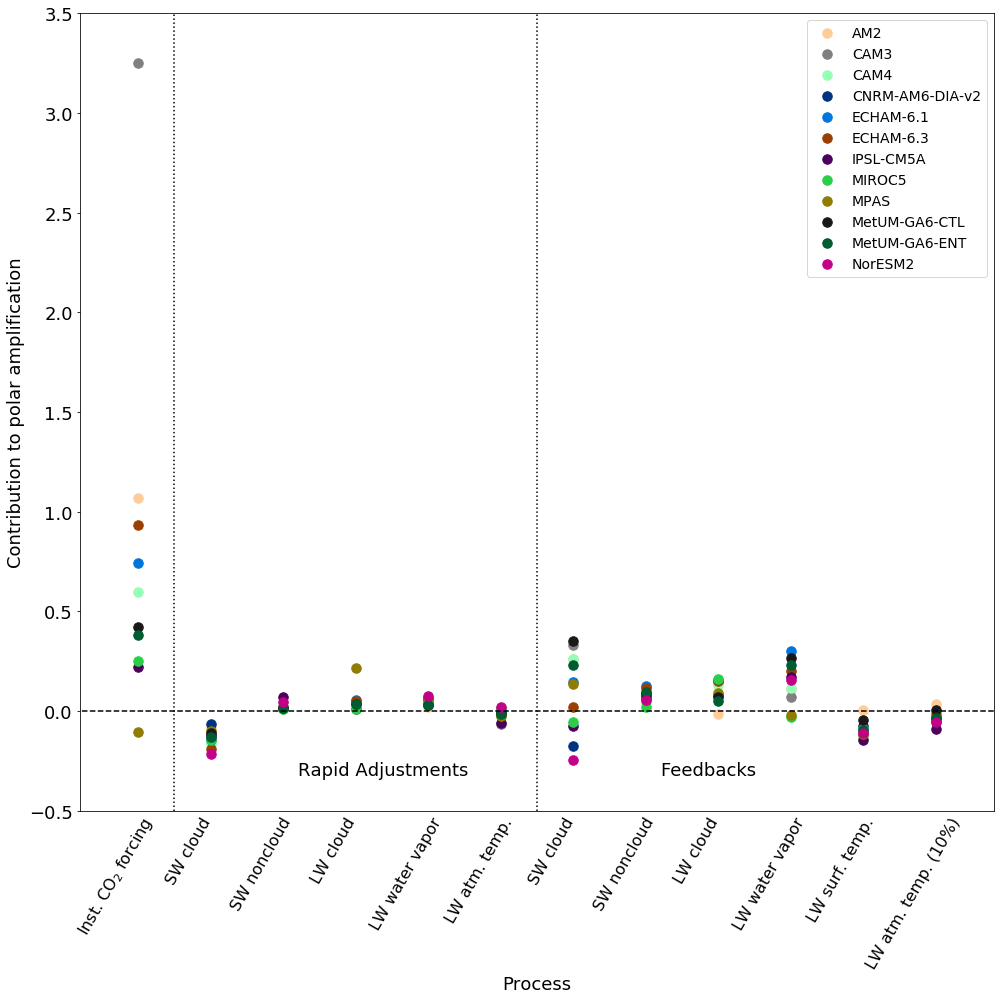

In [110]:
plt.figure(figsize=(14,14))
for model in models_12:
    plt.scatter(np.arange(len(exp)-1)+1, -polar_amp_diff.sel(model=model).isel(exp=np.arange(1,len(exp))), color=voigtColors[model], s=90)
plt.ylabel('Contribution to polar amplification', fontsize=18)
plt.xlabel('Process', fontsize=18)
plt.gca().set_xticks(np.arange(1,len(exp))-.3)
plt.gca().tick_params(axis='x', length=0)
plt.gca().set_xticklabels(exp_names_human, rotation=60, fontsize=16)
plt.gca().tick_params(axis='y', labelsize=18)
plt.gca().set_xlim([0.2, len(exp)-.2])
plt.gca().set_ylim([-0.5,3.5])
#plt.title('Difference in polar amplification: Aqua4xCO2 - AquaControl, from moist EBM', fontsize=22)
plt.hlines(0, 0, len(exp), linestyles='dashed')
plt.vlines(1.5,-.5, 3.5, linestyles='dotted')
plt.vlines(6.5,-.5, 3.5, linestyles='dotted')
plt.text(3.2, -.32, 'Rapid Adjustments', fontsize=18)
plt.text(8.2, -.32, 'Feedbacks', fontsize=18)
plt.legend(models_12, loc='upper right', frameon=True, fontsize=14)
plt.tight_layout()
plt.savefig('plots/dotplot_polar_amp_diff_supplement.png')
plt.savefig('plots/dotplot_polar_amp_diff_supplement.pdf')

In [107]:
#CAM3 outlier: very little warming in global mean in inst. forcing case, despite not looking like an outlier in the 
#scatter plot; results in huge ratio. What is going on? Maybe one latitude with lots of cooling? Look at zonal mean



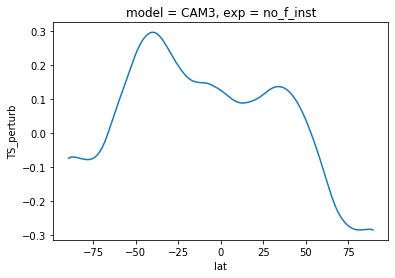

In [109]:
EBM_results['TS_perturb'].sel(exp='no_f_inst', model='CAM3').plot()
#OK, get cooling when calculated this way. So "warming contributions" at different latitudes are OK, but 
#when calculating polar amplification as a ratio things get weird. 

#Could instead calculate ratio of contribution to poleward-of-70 temperature to contribution to global mean temperature, 
#THEN do 

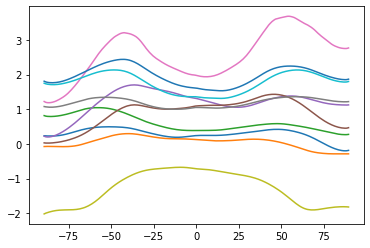

In [116]:
for model in models_12:
    plt.plot(EBM_results.lat, EBM_results['TS_perturb'].sel(exp='no_f_inst',model=model))

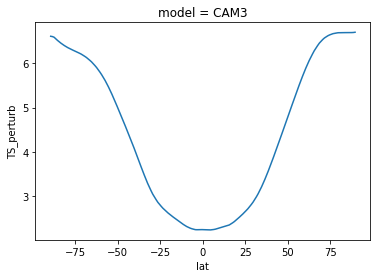

In [113]:
(-EBM_results['TS_perturb'].sel(exp='no_f_inst', model='CAM3')
 +
 EBM_results['TS_perturb'].sel(exp='all', model='CAM3')).plot()